# Résolution d'Équations Différentielles Ordinaires II

Objectifs :

- Implémentation de la méthode de Runge-Kutta d'ordre deux et de la méthode de Runge-Kutta d'ordre quatre

- Représentation numérique de portraits de phase

## La méthode de Runge-Kutta

### Présentation générale

Nous cherchons à résoudre numériquement une équation différentielle d'ordre 1 :
$$
(1)\qquad \left\{ \begin{array}{l l} \frac{d}{dt}u=f(u,t), \\ u(0)=u_0 \end{array}\right.
$$
Le but est d'introduire une classe de méthodes plus précises que les méthodes d'Euler explicite et d'Euler implicite pour résoudre (1). Au lieu de faire une approximation au premier ordre en $\Delta t$ l'idée est de faire une approximation d'un ordre supérieur.

Étants donnés un temps $T_0\in (0,T_{max})$ où $T_{max}$ est le temps maximum d'existence de la solution de (1), on commence comme pour les méthodes d'Euler explicite et implicite par définir un petit pas de temps $\Delta t=\frac{T_0}{K}$ et par discrétiser l'intervalle en des temps $(t_0,t_1,...t_K)$ avec $t_k=k\Delta t$.

L'idée de base est de construire une suite $(u_0,u_1,...,u_K)$ donnant une approximation de la solution $u$ de (1) au temps $t_k$ pour chaque $k\in\{0,...,K\}$. Cette suite est donnée par un schéma à un pas :
$$
(2)\qquad \qquad \left\{ \begin{array}{l l}
u_{k+1}=u_k+ \phi(f,u_k,t_k,\Delta t),\\
u_0=u_0,
\end{array} \right.
$$
où la fonction $\phi$ est appelée la méthode. 

On a vu que la méthode d'Euler explicite est donnée par:
$$
\phi(f,u, t, \Delta t) = \Delta t f(u,t).
$$

Une méthode de Runge-Kutta d'ordre deux est donnée par :
$$
\phi(f,u, t, \Delta t) = \Delta t f\bigg(u + \frac{\Delta t}{2} f(u,t),t+\frac{\Delta t}{2} \bigg) \,.
$$
Une méthode de Runge-Kutta d'ordre quatre est donnée par:
$$
\phi(f,u, t, \Delta t) = \frac{\Delta t}{6} \big(\boldsymbol{k}_1 + 2\boldsymbol{k}_2 + 2\boldsymbol{k}_3 + \boldsymbol{k}_4\big) \,,
$$
où
\begin{align*}
& \boldsymbol{k}_1 =f(u,t),\\
& \boldsymbol{k}_2 =f\bigg(u+\frac{\Delta t}{2}\boldsymbol{k}_{1},t+\frac{\Delta t}{2}\bigg),\\ 
& \boldsymbol{k}_3 =f\bigg(u+\frac{\Delta t}{2}\boldsymbol{k}_{2},t+\frac{\Delta t}{2}\bigg),\\ 
& \boldsymbol{k}_4 =f(u+\Delta t\boldsymbol{k}_{3},t+\Delta t).
\end{align*}

À noter que plus généralement, une méthode de Runge-Kutta d'ordre $s$ est donnée par:
$$
\phi(f,u, t, \Delta t) = \Delta t \sum_{i=1}^s b_i \boldsymbol{k}_i \,,
$$
où
\begin{align*}
& \boldsymbol{k}_1  =f(u,t),\\ 
& \boldsymbol{k}_2  =f(u+\Delta t a_{21}\boldsymbol{k}_{1},t+c_{2}\Delta t),\\ 
& \boldsymbol{k}_3  =f(u+\Delta t(a_{31}\boldsymbol{k}_{1}+a_{32}\boldsymbol{k}_{2}),t+c_{3}\Delta t),\\ 
 & ...\\ 
& \boldsymbol{k}_s  =f(u+\Delta t(a_{s1}\boldsymbol{k}_{1}+a_{s2}\boldsymbol{k}_{2}+\cdots+a_{s,s-1}\boldsymbol{k}_{s-1}),t+c_{s}\Delta t).
\end{align*}

Les coefficients $a_{ij}$ (pour $1 \leq j < i \leq s$), $c_i$ (pour $2 \leq i \leq s$), et $b_i$ (pour $1 \leq i \leq s$), sont souvent représentés dans un tableau dit de Butcher:
$$
\begin{array}{c|ccccc}
0\\ 
c_{2} & a_{21}\\ 
c_{3} & a_{31} & a_{32}\\ 
\vdots & \vdots &  & \ddots\\ 
c_{s} & a_{s1} & a_{s2} & \cdots & a_{s,s-1}\\ 
\hline  & b_{1} & b_{2} & \cdots & b_{s-1} & b_{s}
\end{array}
$$
Par exemple, le tableau de Butcher de la méthode précédente d'ordre deux est:
$$
\begin{array}{c|cc}
0\\ 
\frac{1}{2} & \frac{1}{2}\\ 
\hline  & 0 & 1
\end{array}
$$
et celui de la méthode d'ordre quatre:
$$
\begin{array}{c|cccc}
0\\ 
\frac{1}{2} & \frac{1}{2}\\ 
\frac{1}{2} & 0 & \frac{1}{2}\\ 
1 & 0 & 0 & 1\\ 
\hline  & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
\end{array}
$$

### Algorithmes

__Exercice 1.__

**1.**
Définir une fonction `integrate(f, u0, t, phi)` qui pour une liste de temps $(t_i)_ {i=0}^N$ donnée retourne les valeurs correspondantes $\boldsymbol{x}_0,\boldsymbol{x}_1,\dots,\boldsymbol{x}_N$ avec la méthode $\phi$.



**2.**
Implémenter les fonctions `phi(f,t,u,Deltat)` pour la méthode d'Euler explicite et la méthode de Runge-Kutta d'ordre deux. Comparer les deux méthodes sur l'exemple d'une équation différentielle ordinaire de votre choix.

**3.**
Implémenter la fonction `phi(f,t,u,Deltat)` pour la méthode de Runge-Kutta d'ordre quatre. Comparer avec la méthode d'ordre deux.


## Illustration numérique de portraits de phase

### Trajectoires 
Considérons une EDO autonome
$$
(3)\qquad x'=f(x).
$$
Un portrait de phase représente des trajectoires d'une équation différentielle dans l'espace des phases. On se donne quelques données initiales $(x_0^{(0)},x_{0}^{(1)},...,x^{(n-1)}_0)$ et on trace les courbes des valeurs prises par les solutions correspondantes $\{x^{(0)}(t)\}_{t\in [0,T]}$, $\{x^{(1)}(t)\}_{t\in [0,T]}$, ..., $\{x^{(n-1)}(t)\}_{t\in [0,T]}$.

On considère l'exemple du pendule simple
$$
x''=\sin(x).
$$
En considérant le vecteur $u=(x,x')$ c'est une équation différentielle ordinaire autonome d'ordre 1
$$
(4) \qquad u'=f(u),
$$
avec
$$
f(u_0,u_1)=(u_1,\sin(u_0)).
$$

On trace par exemple la solution partant de $(-1,1)$.

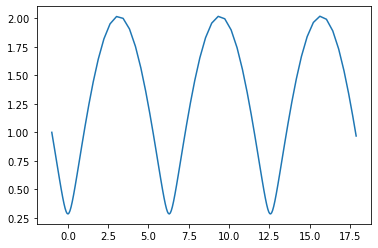

In [14]:
import numpy as np
import scipy.integrate as sc_int
from matplotlib import pyplot as plt
def f1(u,t):
    return(np.array([u[1],np.sin(u[0])]))
x01=np.array([-1,1])
t1=np.linspace(0,20,100)
x1=sc_int.odeint(f1,x01,t1)
plt.plot(x1[:,0],x1[:,1])

On complète en traçant d'autres trajectoires, par exemple celles correspondant aux données initiales $(-1,2)$, $(1,0)$, $(2,0)$, $(3,0)$, $(9,-2)$, $(9,-3)$

(-4.0, 4.0)

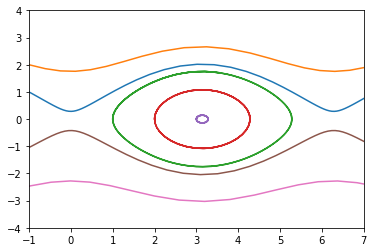

In [15]:
x02=np.array([-1,2])
x03=np.array([1,0])
x04=np.array([2,0])
x05=np.array([3,0])
x06=np.array([9,-2])
x07=np.array([9,-3])
t2=np.linspace(0,20,100)
x2=sc_int.odeint(f1,x02,t1)
x3=sc_int.odeint(f1,x03,t1)
x4=sc_int.odeint(f1,x04,t1)
x5=sc_int.odeint(f1,x05,t1)
x6=sc_int.odeint(f1,x06,t1)
x7=sc_int.odeint(f1,x07,t1)
plt.plot(x1[:,0],x1[:,1])
plt.plot(x2[:,0],x2[:,1])
plt.plot(x3[:,0],x3[:,1])
plt.plot(x4[:,0],x4[:,1])
plt.plot(x5[:,0],x5[:,1])
plt.plot(x6[:,0],x6[:,1])
plt.plot(x7[:,0],x7[:,1])
plt.xlim(-1,7)    # la representation graphique sera faite pour x entre -1 et 7
plt.ylim(-4, 4)   # la representation graphique sera faite pour y entre -4 et 4

### Isoclines de niveau 0
Il est parfait utile de considérer les isoclines de niveau 0. Ce sont les ensembles où la variation temporelle d'une coordonnée est nulle : $\{x_0'=0\}$, $\{x_1'=0\}$, ..., $\{x_{n-1}'=0\}$. Puisque $x$ vérifie l'EDO $(3)$, alors $x_i'=0$ si et seulement si $f_i(x)=0$. L'ensemble $\{x_i'=0\}$ correspond donc à $\{f_i(x)=0\}$, l'ensemble des zéros de la $i$-ième coordonnée du champ de vecteur $f$. On remarque que l'intersection de toutes ces isoclines est égale à l'ensemble des points stationnaires :
$$
\cap_{i=0}^{n-1}\{x_i'=0\}= \{x\in \mathbb R^n, \mbox{ tel que} f(x)=0\}.
$$

Pour l'exemple du pendule (4), on a que $u_0'=0$ si et seulement si $u_1=0$, et $u_1'=0$ si et seulement si $\sin (u_0)=0$ soit $u_0=\pi \mathbb N$. On a donc
$$
\{u_0'=0\}=\{(u_0,u_1)\in \mathbb R^2 \mbox{ tel que }u_1=0\}
$$
et
$$
\{u_1'=0\}=\cup_{j\in \mathbb N}\{(u_0,u_1)\in \mathbb R^2 \mbox{ tel que }u_0=\pi j\}.
$$
On peut représenter ces isoclines numériquement

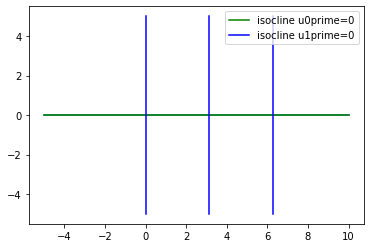

In [16]:
iso0=np.zeros([100,2])
iso0[:,0]=np.linspace(-5,10,100)
plt.plot(iso0[:,0],iso0[:,1])
iso10=np.zeros([100,2])
iso10[:,1]=np.linspace(-5,5,100)
iso11=np.pi*np.ones([100,2])
iso11[:,1]=np.linspace(-5,5,100)
iso12=2*np.pi*np.ones([100,2])
iso12[:,1]=np.linspace(-5,5,100)
plt.plot(iso0[:,0],iso0[:,1],'g',label='isocline u0prime=0')
plt.plot(iso10[:,0],iso10[:,1],'b',label='isocline u1prime=0')
plt.plot(iso11[:,0],iso11[:,1],'b')
plt.plot(iso12[:,0],iso12[:,1],'b')
plt.legend()

On peut alors représenter les isoclines de niveau 0 et les trajectoires simultanément.

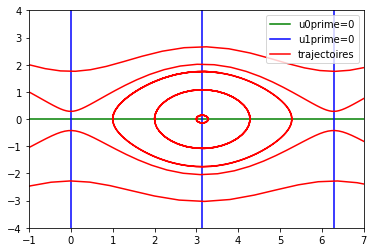

In [17]:
plt.plot(iso0[:,0],iso0[:,1],'g',label='u0prime=0')
plt.plot(iso10[:,0],iso10[:,1],'b',label='u1prime=0')
plt.plot(iso11[:,0],iso11[:,1],'b')
plt.plot(iso12[:,0],iso12[:,1],'b')
plt.plot(x1[:,0],x1[:,1],'r',label='trajectoires')
plt.plot(x2[:,0],x2[:,1],'r')
plt.plot(x3[:,0],x3[:,1],'r')
plt.plot(x4[:,0],x4[:,1],'r')
plt.plot(x5[:,0],x5[:,1],'r')
plt.plot(x6[:,0],x6[:,1],'r')
plt.plot(x7[:,0],x7[:,1],'r')
plt.xlim(-1,7)   
plt.ylim(-4, 4)
plt.legend()

### Champ de vecteurs

En chaque point $x\in \mathbb R^n$, le vecteur $f(x)\in \mathbb R^n$ définit une direction $\frac{f(x)}{\| f(x)\|}$ et une vitesse $\| f(x)\|$. On peut alors représenter le vecteur qui part du point $x$, de norme $\| f(x)\|$ et de direction $\frac{f(x)}{\| f(x)\|}$. La fonction `pyplot.quiver` permet de représenter de tels vecteurs en plusieurs points. Ci-dessous, par exemple, on représente le vecteur $(F_0,G_0)=(0,1)$ en $(0,0)$, et le vecteur $(F_1,G_1)=(1,1)$ en $(2,0)$.

(-1.0, 3.0)

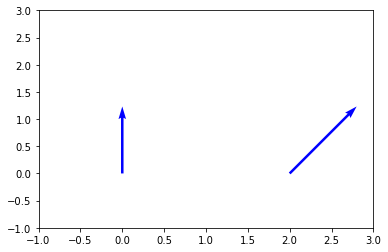

In [18]:
X=np.array([0,2])    # X represente les abscisses des points
Y=np.array([0,0])    # Y represente les ordonnees des points
# Le premier point est (X[0],Y[0])=(0,0), le second point est (X[1],Y[1])=(2,0)
F=np.array([0,1])   
G=np.array([1,1])
plt.quiver(X,Y,F,G, color='b',scale=5)    # l'option scale permet de mettre à l'échelle les vecteurs
plt.xlim(-1, 3)   
plt.ylim(-1, 3)

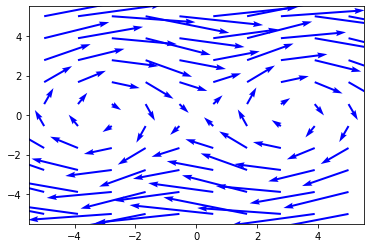

In [19]:
U0,U1=np.meshgrid(np.linspace(-5, 5, 10),np.linspace(-5, 5, 10)) 
V0=np.zeros([10,10])
V1=np.zeros([10,10])
for i in range(10):
    for j in range(10):
        V0[i,j]=f1(np.array([U0[i,j],U1[i,j]]),0)[0]
        V1[i,j]=f1(np.array([U0[i,j],U1[i,j]]),0)[1]
plt.quiver(U0,U1,V0,V1, color='b', scale=20) 

__Exercice 2__

On considère le système de Lotka-Volterra suivant sur l’intervalle : 
$$
\left\{ \begin{array}{l l}
x′(t) = x(t)\left(1 − \frac{y(t)}{5} \right),\\
y′(t) = y(t)\left(\frac{x(t)}{5} − 2\right)
\end{array} \right.
$$
avec x(0) = 100 et y(0) = 70. On pourra utiliser la méthode de son choix pour calculer la solution de ce problème.

__1.__ Tracer dans l’espace des phases la trajectoire de la solution qui a pour donnée initiale $(x_0,y_0)=(15,10)$, pour $t\in [0,10]$.

__2.__ Tracer les isoclines $\{ x'=0\}$ et $\{ y'=0\}$ dans l’espace des phases.

__3.__ Ajouter d’autres trajectoires que celle partant de $(15,10)$ dans l’espace des phases. 

__4.__ Représenter le champ de vecteur $(x,y)\mapsto (x(1-y/5),y(x/5-2))$ pour compléter le portrait de phase.

__Exercice 3__

__1.__ Représenter numériquement la solution du système de Lorenz suivant sur l'intervalle $[0, 30]$ à l'aide de la méthode de votre choix :
$$
\left\{ \begin{array}{llll} x' = 10(y - x),\\
y' = - x z + 28 x - y,\\
z' = x y - \frac{8}{3} z, \end{array} \right.
$$
pour les données initiales $x(0) = - 3$, $y(0) = - 6$ et $z(0) = 12$.

__2.__ Au vu de votre simulation numérique, la solution semble-t-elle se stabiliser ?